In [1]:
import pandas as pd
import numpy as bp
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SIMEC_UTF8.csv',low_memory = False, dtype =str)
pd.set_option('display.max_columns', None)

In [3]:
df

,ID,Nome,Situação,Obra Vinculada,Município,UF,CEP,Logradouro,Número,Latitude,Longitude,IBGE,INEP,Quantidade Alunos,Código Município,Situação atual da Solicitação Retomada,Anexos Inseridos na Solicitação?,Data Última Análise Solicitação,Alteração Projeto,Bairro,Termo/Convênio,Fim da Vigência Termo/Convênio,Situação do Termo/Convênio,Percentual de Execução,Data Prevista de Conclusão da Obra,Tipo de ensino / Modalidade,Tipo do Projeto,Tipo da Obra,Classificação da Obra,Rede de Ensino Público,CNPJ,Inscrição Estadual,Nome da Entidade,Razão Social,Email,Sigla,Telefone Comercial,Fax,CEP Entidade,Logradouro Entidade,Complemento Entidade,Número Entidade,Bairro Entidade,UF Entidade,Munícipio Entidade,Modalidade de Licitação,Número da Licitação,Homologação da Licitação,Empresa Contratada,Data de Assinatura do Contrato,Prazo de Vigência,Data de Término do Contrato,Valor do Contrato,Valor Pactuado FNDE,Aporte de Recurso Município,Data da Última Vistoria do Estado ou Município,Situação da Vistoria,Tipo Paralisação,OBS,Total Pago,Percentual Pago,Banco,Agência,Conta,Data,Saldo da Conta,Saldo Fundos,Saldo da Poupança,Saldo CDB,Saldo TOTAL
0,1365,830167 - Escola de Educação Infantil - Tipo B ...,Concluída,N o,Tauá,CE,63660000.0,Rua PEDRO INÁCIO DE SOUSA,S/N,06.00.35.,40.16.58,230402013302.0,NaN,224.0,2313302.0,NaN,N o,NaN,N o,BEZERRA E SOUSA,830167/2007,13/11/2011,Vencido,100.0,NaN,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,7849532000147.0,000000277919,PREF MUN DE TAUA,MUNICIPIO DE TAUA/PREFEITURA MUNICIPAL ...,planejamentotaua@gmail.com,PMT,(88) 34372068 Ramal:,(88) 34372068 Ramal:,63660000.0,Centro Administrativo José Fernandes Castelo -...,NaN,S/N,Planalto dos Colibris,NaN,Tauá,Tomada de Preço,NaN,2008-07-04 00:00:00,(63476931000180) Edmil Eletrificação LTDA,2008-07-04 00:00:00,1030.0,2011-04-30 00:00:00,1003776.02,950000.0,69187.69,2012-09-24 00:00:00,Concluído,NaN,NaN,NaN,NaN,1.0,1155.0,0000327778,2016-06-30 23:59:59,0.0,0.0,0.0,0.0,0.0
1,1366,830361 - Escola de Educação Infantil - Tipo B ...,Concluída,N o,Conchas,SP,18570000.0,RUA LUIZ SARTORI,137,23.1.20.,48.00.56,350402312308.0,NaN,224.0,3512308.0,NaN,Sim,NaN,N o,JARDIM OLIVEIRA,830361/2007,24/02/2012,Vencido,100.0,NaN,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,46634119000117.0,000000280248,PREF MUN DE CONCHAS,CONCHAS PREFEITURA ...,gabinete@conchas.sp.gov.br,SP,(14) 3845-8011 Ramal:,(14) 3845-8012 Ramal:,18570000.0,RUA MINAS GERAIS,NaN,707,CENTRO,NaN,Conchas,Tomada de Preço,22008,2009-01-12 00:00:00,(61600094000124) KITA CONSTRUTORA LTDA,2009-04-02 00:00:00,758.0,2011-04-30 00:00:00,1117078.09,1117078.09,36672.96,2011-12-30 00:00:00,Concluído,NaN,NaN,NaN,NaN,1.0,1791.0,0000102784,2010-12-31 23:59:59,0.0,107576.07,0.0,0.0,107576.07
2,1367,830053 - Escola de Educação Infantil - Itararé/SP,Concluída,N o,Itararé,SP,18460000.0,Rua Sofia Dias Menck,sn,,,351104123206.0,NaN,224.0,3523206.0,NaN,N o,NaN,N o,Jd. Santa terezinha,830053/2007,13/07/2014,Vencido,100.0,22/08/2014,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,46634390000152.0,000000280359,PREFEITURA MUNICIPAL DE ITARARE,Prefeitura Municipal de Itararé ...,gabinete@itarare.sp.gov.br,PMI,(15) 35328000 Ramal:,(15) 35328025 Ramal:,18460007.0,Rua XV de Novembro,NaN,83,Centro,NaN,Itararé,Convite,082008,2008-12-04 00:00:00,(07336385000101) R. G. CONSTRUCOES ITAPEVA LTDA,2008-12-04 00:00:00,730.0,2010-12-04 00:00:00,1021712.13,1024031.0,45351.5,2014-08-18 00:00:00,Concluído,NaN,NaN,NaN,NaN,1.0,420.0,0000198463,2010-11-30 23:59:59,0.0,7893.77,0.0,0.0,7893.77
3,1368,710101 - Escola de Educação Infantil - Reserva...,Concluída,N o,Reserva do Cabaçal,MT,78265000.0,Rua princesa izabel,s/n,15.07.30.,58.22.40,510301407156.0,NaN,224.0,5107156.0,NaN,N o,NaN,N o,Centro,710101/2008,26/09/2013,Vencido,63.88,02/01/2014,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,1367788000131.0,000000282082,PREF MUN DE RESERVA DO CABACA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30673 entries, 0 to 30672
Data columns (total 70 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ID                                              30673 non-null  object
 1   Nome                                            30507 non-null  object
 2   Situação                                        30672 non-null  object
 3   Obra Vinculada                                  30673 non-null  object
 4   Município                                       30459 non-null  object
 5   UF                                              30459 non-null  object
 6   CEP                                             28760 non-null  object
 7   Logradouro                                      27023 non-null  object
 8   Número                                          20604 non-null  object
 9   Latitude                                        29

In [8]:

numericos = {
    'Número': 'Int64',
    'Número da Licitação': 'Int64',
    'Quantidade Alunos': 'Int64',
    'Prazo de Vigência': 'Int64',
    'Número Entidade': 'Int64',
    'Banco': 'Int64'
}

flutuantes = {
    'Saldo da Conta': 'Float64',
    'Saldo Fundos': 'Float64',
    'Saldo da Poupança': 'Float64',
    'Saldo CDB': 'Float64',
    'Saldo TOTAL': 'Float64',
    'Latitude': 'Float64',
    'Longitude': 'Float64',
    'IBGE': 'Float64',
    'Percentual de Execução': 'Float64',
    'Valor do Contrato': 'Float64',
    'Valor Pactuado FNDE': 'Float64',
    'Aporte de Recurso Município': 'Float64',
    'Total Pago': 'Float64',
    'Percentual Pago': 'Float64'
}

colunas_data = [
    'Data Última Análise Solicitação',
    'Fim da Vigência Termo/Convênio',
    'Homologação da Licitação',
    'Data de Assinatura do Contrato',
    'Data de Término do Contrato',
    'Data da Última Vistoria do Estado ou Município',
    'Data Prevista de Conclusão da Obra',
    'Data'
]

for coluna, tipo in numericos.items():
    if coluna in df.columns:
        df[coluna] = (
            pd.to_numeric(
                df[coluna]
                .astype(str)
                .str.replace(r'[^0-9-]', '', regex=True)  # mantém apenas números e hífens
                .str.strip(),
                errors='coerce'
            ).astype(tipo)
        )

for coluna, tipo in flutuantes.items():
    if coluna in df.columns:
        df[coluna] = (
            pd.to_numeric(
                df[coluna]
                .astype(str)
                .str.replace(',', '.', regex=False)  # troca vírgula por ponto
                .str.replace(r'[^0-9.-]', '', regex=True)  # limpa caracteres não numéricos
                .str.strip(),
                errors='coerce'
            ).astype(tipo)
        )

# Converter colunas de datas
for coluna in colunas_data:
    if coluna in df.columns:
        df[coluna] = pd.to_datetime(df[coluna], errors='coerce', format = '%d-%m-%Y')


In [9]:
num_cols = df.select_dtypes(include=['number']).columns
str_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(0)
df[str_cols] = df[str_cols].fillna('-')

In [28]:
df['Tipo do Projeto'].value_counts()

Tipo do Projeto
Quadra Escolar Coberta com Vestiário             5304
Escola de Educação Infantil Tipo B               3454
Escola 6 Salas                                   2099
Cobertura de Quadra Escolar Pequena              2067
Reforma                                          2054
Ampliação                                        1692
Creche Pré-Escola - Tipo 1                       1497
Escola de Educação Infantil Tipo C               1488
Creche Pré-Escola - Tipo 2                       1157
Quadra Coberta - Projeto Próprio                  977
MI - Escola de Educação Infantil Tipo B           939
Escola 2 Salas                                    926
Escola 4 Salas                                    910
Escola 12 Salas                                   822
Escola - Projeto Próprio                          801
Cobertura de Quadra Escolar Grande                781
Quadra Escolar Coberta com Palco                  710
Cobertura de Quadra - Projeto Próprio             543
Escola 1 Sal

In [10]:
df

,ID,Nome,Situação,Obra Vinculada,Município,UF,CEP,Logradouro,Número,Latitude,Longitude,IBGE,INEP,Quantidade Alunos,Código Município,Situação atual da Solicitação Retomada,Anexos Inseridos na Solicitação?,Data Última Análise Solicitação,Alteração Projeto,Bairro,Termo/Convênio,Fim da Vigência Termo/Convênio,Situação do Termo/Convênio,Percentual de Execução,Data Prevista de Conclusão da Obra,Tipo de ensino / Modalidade,Tipo do Projeto,Tipo da Obra,Classificação da Obra,Rede de Ensino Público,CNPJ,Inscrição Estadual,Nome da Entidade,Razão Social,Email,Sigla,Telefone Comercial,Fax,CEP Entidade,Logradouro Entidade,Complemento Entidade,Número Entidade,Bairro Entidade,UF Entidade,Munícipio Entidade,Modalidade de Licitação,Número da Licitação,Homologação da Licitação,Empresa Contratada,Data de Assinatura do Contrato,Prazo de Vigência,Data de Término do Contrato,Valor do Contrato,Valor Pactuado FNDE,Aporte de Recurso Município,Data da Última Vistoria do Estado ou Município,Situação da Vistoria,Tipo Paralisação,OBS,Total Pago,Percentual Pago,Banco,Agência,Conta,Data,Saldo da Conta,Saldo Fundos,Saldo da Poupança,Saldo CDB,Saldo TOTAL
0,1365,830167 - Escola de Educação Infantil - Tipo B ...,Concluída,N o,Tauá,CE,63660000.0,Rua PEDRO INÁCIO DE SOUSA,0,0.0,0.0,230402013302.0,-,2240,2313302.0,-,N o,NaT,N o,BEZERRA E SOUSA,830167/2007,2011-11-13,Vencido,100.0,NaT,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,7849532000147.0,000000277919,PREF MUN DE TAUA,MUNICIPIO DE TAUA/PREFEITURA MUNICIPAL ...,planejamentotaua@gmail.com,PMT,(88) 34372068 Ramal:,(88) 34372068 Ramal:,63660000.0,Centro Administrativo José Fernandes Castelo -...,-,0,Planalto dos Colibris,-,Tauá,Tomada de Preço,0,2008-04-07,(63476931000180) Edmil Eletrificação LTDA,2008-04-07,10300,2011-04-30,1003776.02,950000.0,69187.69,2012-09-24,Concluído,-,-,0.0,0.0,10,1155.0,0000327778,2016-06-30 23:59:59,0.0,0.0,0.0,0.0,0.0
1,1366,830361 - Escola de Educação Infantil - Tipo B ...,Concluída,N o,Conchas,SP,18570000.0,RUA LUIZ SARTORI,137,0.0,0.0,350402312308.0,-,2240,3512308.0,-,Sim,NaT,N o,JARDIM OLIVEIRA,830361/2007,2012-02-24,Vencido,100.0,NaT,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,46634119000117.0,000000280248,PREF MUN DE CONCHAS,CONCHAS PREFEITURA ...,gabinete@conchas.sp.gov.br,SP,(14) 3845-8011 Ramal:,(14) 3845-8012 Ramal:,18570000.0,RUA MINAS GERAIS,-,707,CENTRO,-,Conchas,Tomada de Preço,22008,2009-12-01,(61600094000124) KITA CONSTRUTORA LTDA,2009-02-04,7580,2011-04-30,1117078.09,1117078.09,36672.96,2011-12-30,Concluído,-,-,0.0,0.0,10,1791.0,0000102784,2010-12-31 23:59:59,0.0,107576.07,0.0,0.0,107576.07
2,1367,830053 - Escola de Educação Infantil - Itararé/SP,Concluída,N o,Itararé,SP,18460000.0,Rua Sofia Dias Menck,0,0.0,0.0,351104123206.0,-,2240,3523206.0,-,N o,NaT,N o,Jd. Santa terezinha,830053/2007,2014-07-13,Vencido,100.0,2014-08-22,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,46634390000152.0,000000280359,PREFEITURA MUNICIPAL DE ITARARE,Prefeitura Municipal de Itararé ...,gabinete@itarare.sp.gov.br,PMI,(15) 35328000 Ramal:,(15) 35328025 Ramal:,18460007.0,Rua XV de Novembro,-,83,Centro,-,Itararé,Convite,82008,2008-04-12,(07336385000101) R. G. CONSTRUCOES ITAPEVA LTDA,2008-04-12,7300,2010-12-04,1021712.13,1024031.0,45351.5,2014-08-18,Concluído,-,-,0.0,0.0,10,420.0,0000198463,2010-11-30 23:59:59,0.0,7893.77,0.0,0.0,7893.77
3,1368,710101 - Escola de Educação Infantil - Reserva...,Concluída,N o,Reserva do Cabaçal,MT,78265000.0,Rua princesa izabel,0,0.0,0.0,510301407156.0,-,2240,5107156.0,-,N o,NaT,N o,Centro,710101/2008,2013-09-26,Vencido,63.88,2014-01-02,Educação Básica,Escola de Educação Infantil Tipo B,Construção,Urbana,Municipal,1367788000131.0,000000282082,PREF MUN DE RESERVA DO CABACAL,RESERVA DO CABACAL PREFEITURA MUNICIPAL ...,prefeiturareserva@gmail.com,PMRC,(65) 32471124 Ramal:,(65) 32471124 Ramal:,78265000.0,AV. MATO GROSSO,-,221,CENTRO,-,Reserva do Cabaçal,Tomada de Pr

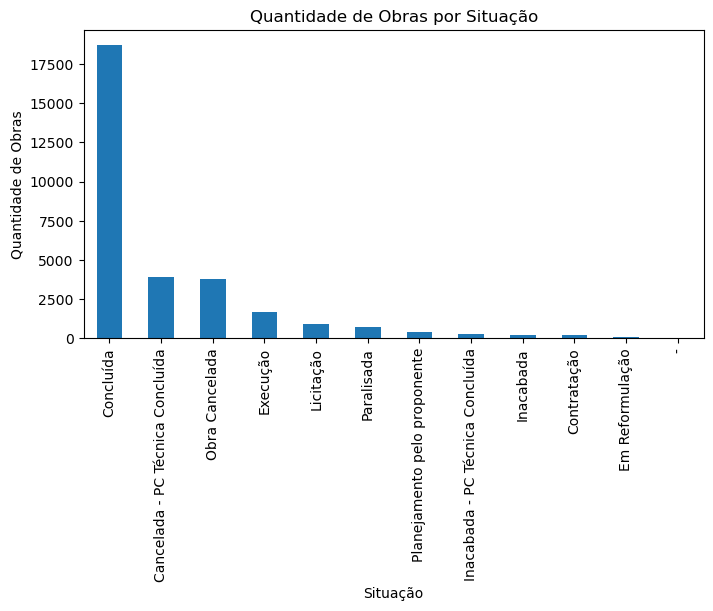

In [12]:
obras_por_situacao = df['Situação'].value_counts()

obras_por_situacao.plot(kind='bar', figsize=(8,4))
plt.title('Quantidade de Obras por Situação')
plt.xlabel('Situação')
plt.ylabel('Quantidade de Obras')
plt.show()

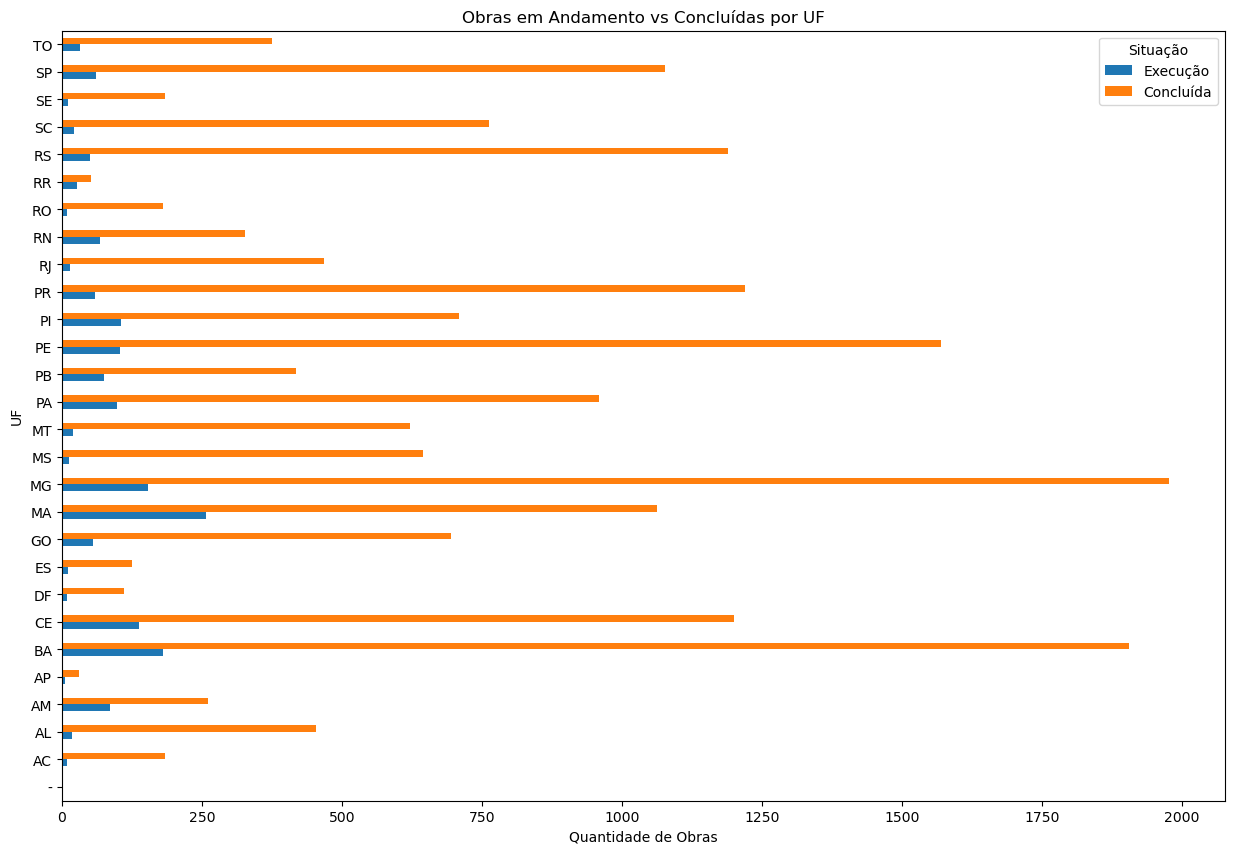

In [22]:
obras_por_uf = df.groupby(['UF','Situação']).size().unstack(fill_value=0)

obras_por_uf[['Execução', 'Concluída']].plot(kind='barh', stacked=False, figsize=(15,10))
plt.title('Obras em Andamento vs Concluídas por UF')
plt.xlabel('Quantidade de Obras')
plt.ylabel('UF')
plt.show()


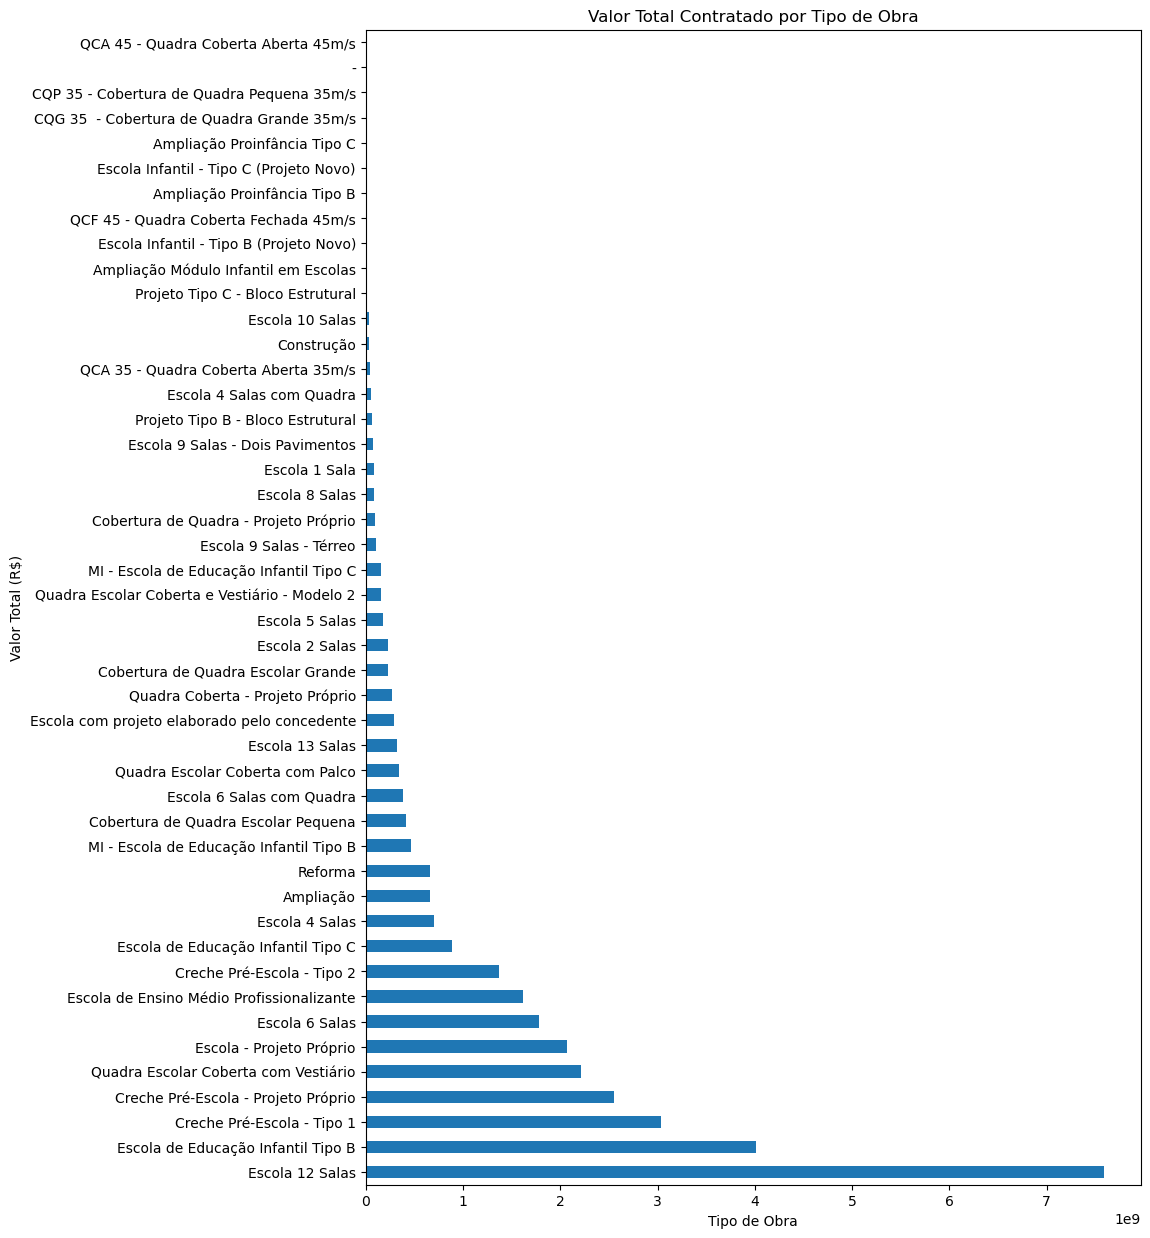

In [31]:
valor_por_tipo = df.groupby('Tipo do Projeto')['Valor do Contrato'].sum().sort_values(ascending=False)

valor_por_tipo.plot(kind='barh', figsize=(10,15))
plt.title('Valor Total Contratado por Tipo de Obra')
plt.xlabel('Tipo de Obra')
plt.ylabel('Valor Total (R$)')
plt.show()

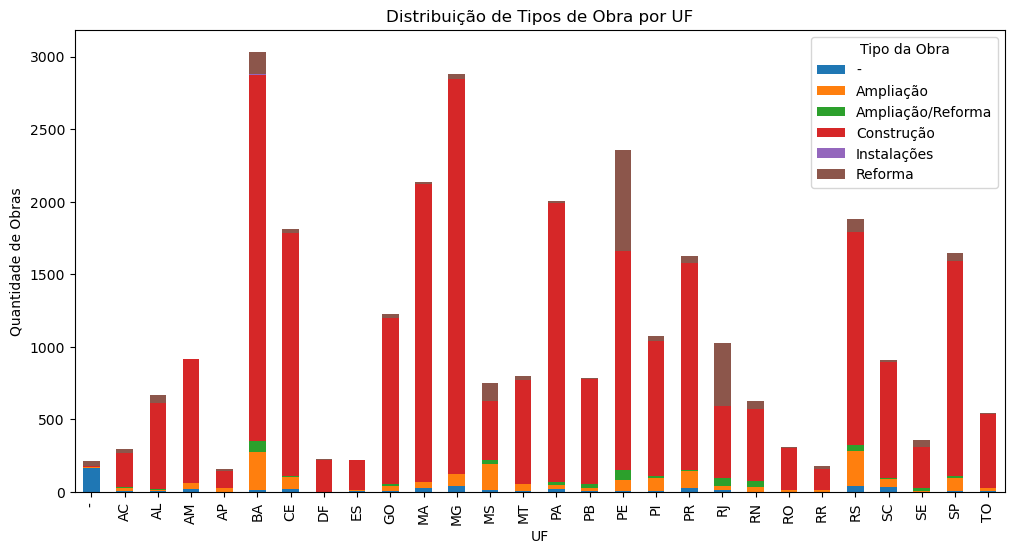

In [36]:
tipo_por_uf = df.groupby(['UF', 'Tipo da Obra']).size().unstack(fill_value=0)

tipo_por_uf.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribuição de Tipos de Obra por UF')
plt.xlabel('UF')
plt.ylabel('Quantidade de Obras')
plt.show()


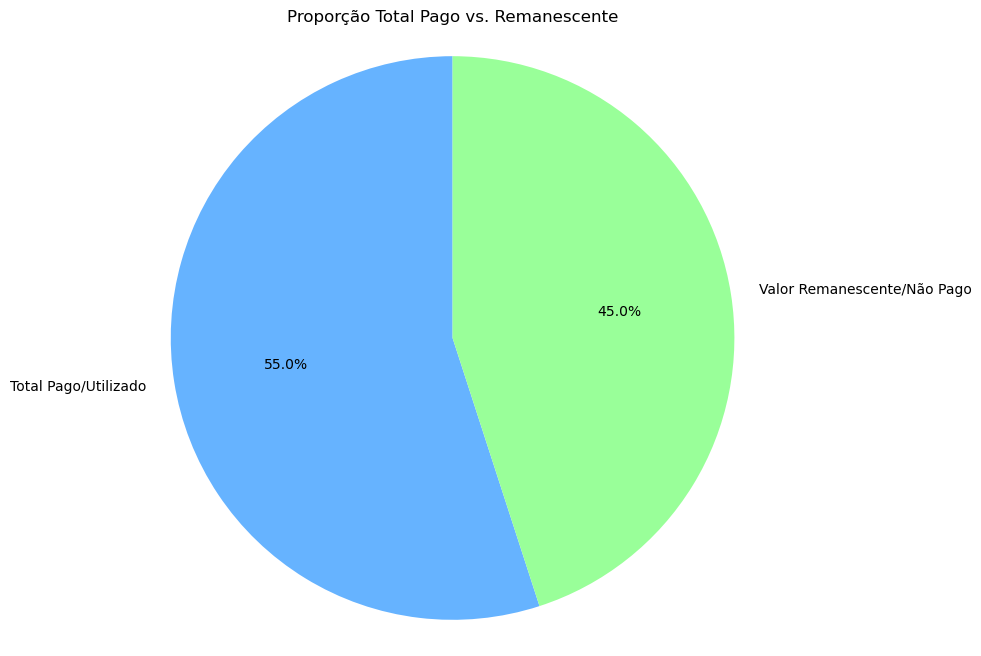

In [ ]:
condicao = df['Situação'] == 'Concluída' 

total_pago = df[condicao]['Total Pago'].sum() 

valor_total_contrato = df[condicao]['Valor do Contrato'].sum()

valor_remanescente_contrato = valor_total_contrato - total_pago 

# Define as fatias
sizes = [total_pago, valor_remanescente_contrato]
labels = ['Total Pago/Utilizado', 'Valor Remanescente/Não Pago']


plt.figure(figsize=(8, 8)) 


plt.pie(
    sizes,
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99']
)

plt.title("Proporção Total Pago vs. Remanescente")
plt.axis('equal') 

plt.show()